In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
credit_reports=pd.read_csv('credit_reports.csv')
users=pd.read_csv('users.csv')

from pandas import read_csv

#  An overwiev from credit reports

In [3]:
print(f'Dataset credit reports shape: {credit_reports.shape}')
credit_reports.head()

Dataset credit reports shape: (16309, 17)


,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_date,worst_delinquency_past_due_balance
0,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,11/10/14,12/5/15,9826.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,0.0,12/5/15,10/14/16,16000.0,0.0,0.0,0.0,3.0,1.0,5/28/16,200.0
2,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,102.0,Semanal,100.0,9/2/16,NaN,10205.0,3505.0,0.0,0.0,3.0,1.0,3/3/17,100.0
3,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,120.0,Semanal,191.0,10/14/16,NaN,22920.0,11269.0,0.0,0.0,3.0,1.0,3/3/17,191.0
4,0,KONFIO,Pagos Fijos,Préstamo Personal,12.0,Quincenal,0.0,12/27/16,6/27/17,150000.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
credit_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   user_id                             16309 non-null  int64  
 1   institution                         16309 non-null  object 
 2   account_type                        16309 non-null  object 
 3   credit_type                         16309 non-null  object 
 4   total_credit_payments               16268 non-null  float64
 5   payment_frequency                   16308 non-null  object 
 6   amount_to_pay_next_payment          16304 non-null  float64
 7   account_opening_date                16309 non-null  object 
 8   account_closing_date                9068 non-null   object 
 9   maximum_credit_amount               16307 non-null  float64
 10  current_balance                     16304 non-null  float64
 11  credit_limit                        16296

In [5]:
credit_reports.isnull().sum()

user_id                                   0
institution                               0
account_type                              0
credit_type                               0
total_credit_payments                    41
payment_frequency                         1
amount_to_pay_next_payment                5
account_opening_date                      0
account_closing_date                   7241
maximum_credit_amount                     2
current_balance                           5
credit_limit                             13
past_due_balance                          5
number_of_payments_due                   12
worst_delinquency                        54
worst_delinquency_date                12997
worst_delinquency_past_due_balance       12
dtype: int64

##  Getting all NAN features from credit reports

In [6]:
feature_na=[]
for feature in credit_reports.columns:
    if credit_reports[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na

['total_credit_payments',
 'amount_to_pay_next_payment',
 'account_closing_date',
 'maximum_credit_amount',
 'current_balance',
 'credit_limit',
 'past_due_balance',
 'number_of_payments_due',
 'worst_delinquency',
 'worst_delinquency_date',
 'worst_delinquency_past_due_balance']

In [7]:
##### % of missing values 

In [8]:
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,round(credit_reports[feature].isnull().sum()/len(credit_reports)*100,4)))

total_credit_payments has 0.2514 % missing values
amount_to_pay_next_payment has 0.0307 % missing values
account_closing_date has 44.3988 % missing values
maximum_credit_amount has 0.0123 % missing values
current_balance has 0.0307 % missing values
credit_limit has 0.0797 % missing values
past_due_balance has 0.0307 % missing values
number_of_payments_due has 0.0736 % missing values
worst_delinquency has 0.3311 % missing values
worst_delinquency_date has 79.6922 % missing values
worst_delinquency_past_due_balance has 0.0736 % missing values


In [9]:
### we can see that worst delinquency date has 79.6922 % missing values so I'll take off this column

In [10]:
credit_reports = credit_reports.drop(['worst_delinquency_date', 'account_opening_date', 'account_closing_date'], axis=1)
credit_reports

,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance
0,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,9826.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,0.0,16000.0,0.0,0.0,0.0,3.0,1.0,200.0
2,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,102.0,Semanal,100.0,10205.0,3505.0,0.0,0.0,3.0,1.0,100.0
3,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,120.0,Semanal,191.0,22920.0,11269.0,0.0,0.0,3.0,1.0,191.0
4,0,KONFIO,Pagos Fijos,Préstamo Personal,12.0,Quincenal,0.0,150000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,715,COMUNICACIONES,Sin Límite Preestablecido,Línea de Crédito,1.0,Mensual,0.0,2655.0,0.0,0.0,0.0,0.0,0.0,0.0
16305,715,COMUNICACIONES,Sin Límite Preestablecido,Línea de Crédito,1.0,Mensual,0.0,6314.0,0.0,0.0,0.0,0.0,0.0,0.0
16306,715,TIENDA COMERCIAL,Pagos Fijos,Aparatos - Muebles,1.0,Mensual,0.0,3976.0,0.0,3976.0,0.0,0.0,0.0,0.0
16307,715,TIENDA COMERCIAL,Pagos Fijos,Aparatos - Muebles,1.0,Mensual,0.0,441.0,0.0,441.0,0.0,0.0,0.0,0.0


In [11]:
credit_group = credit_reports.groupby('user_id').first()

In [12]:
credit_group

,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance
user_id,,,,,,,,,,,,,
0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,9826.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,53.0,Semanal,0.0,10400.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,400.0,16000.0,13400.0,0.0,200.0,10.0,2.0,408.0
3,BANCO,Pagos Fijos,Préstamo de Nomina,72.0,Quincenal,366.0,25135.0,15290.0,25000.0,0.0,0.0,0.0,0.0
4,BANCO,Revolvente,Tarjeta de Crédito,0.0,Mensual,0.0,16469.0,0.0,0.0,6852.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SOCIEDAD FINANCIERA DE OBJETO MULTIPLE,Pagos Fijos,Préstamo Personal,6.0,Catorcenal,945.0,2174.0,2258.0,2174.0,0.0,0.0,0.0,0.0
996,SOCIEDAD FINANCIERA DE OBJETO MULTIPLE,Pagos Fijos,Préstamo Personal,16.0,Semanal,0.0,9056.0,0.0,0.0,0.0,0.0,0.0,0.0
997,BANCOS,Pagos Fijos,Préstamo Personal,16.0,Semanal,0.0,40083.0,0.0,40083.0,0.0,0.0,0.0,0.0


In [13]:
## An overview from users

In [14]:
print(f'Dataset users shape: {users.shape}')
users.head()

Dataset users shape: (1000, 4)


,id,monthly_income,monthly_outcome,class
0,0,255359,151439,1
1,1,8940,789,0
2,2,11436,3316,0
3,3,17143,47547,1
4,4,26990,15585,1


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               1000 non-null   int64
 1   monthly_income   1000 non-null   int64
 2   monthly_outcome  1000 non-null   int64
 3   class            1000 non-null   int64
dtypes: int64(4)
memory usage: 31.3 KB


In [16]:
users.isnull().sum()

id                 0
monthly_income     0
monthly_outcome    0
class              0
dtype: int64

In [17]:
user_id=users.rename(columns={'id':'user_id'})

In [18]:
user_id

,user_id,monthly_income,monthly_outcome,class
0,0,255359,151439,1
1,1,8940,789,0
2,2,11436,3316,0
3,3,17143,47547,1
4,4,26990,15585,1
...,...,...,...,...
995,995,4157,18828,0
996,996,14094,35554,1
997,997,7437,32840,1
998,998,256645,166441,1


In [19]:
## users doesn't have any missing values, so it's time merge with credit reports by user_id

In [20]:
users_and_credit = pd.merge(credit_group,user_id, on='user_id')

In [21]:
users_and_credit.head()

,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
0,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,9826.0,0.0,0.0,0.0,0.0,0.0,0.0,255359,151439,1
1,1,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,53.0,Semanal,0.0,10400.0,0.0,0.0,0.0,0.0,0.0,0.0,8940,789,0
2,2,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,400.0,16000.0,13400.0,0.0,200.0,10.0,2.0,408.0,11436,3316,0
3,3,BANCO,Pagos Fijos,Préstamo de Nomina,72.0,Quincenal,366.0,25135.0,15290.0,25000.0,0.0,0.0,0.0,0.0,17143,47547,1
4,4,BANCO,Revolvente,Tarjeta de Crédito,0.0,Mensual,0.0,16469.0,0.0,0.0,6852.0,0.0,0.0,0.0,26990,15585,1


In [22]:
# Good Clients

In [23]:
good_clients= users_and_credit['class'] == 1
good_clients=users_and_credit[good_clients]
good_clients.head()

,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
0,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,9826.0,0.0,0.0,0.0,0.0,0.0,0.0,255359,151439,1
3,3,BANCO,Pagos Fijos,Préstamo de Nomina,72.0,Quincenal,366.0,25135.0,15290.0,25000.0,0.0,0.0,0.0,0.0,17143,47547,1
4,4,BANCO,Revolvente,Tarjeta de Crédito,0.0,Mensual,0.0,16469.0,0.0,0.0,6852.0,0.0,0.0,0.0,26990,15585,1
6,6,TELEFONIA CELULAR,Revolvente,Línea de Crédito,0.0,Mensual,0.0,784.0,0.0,1197.0,0.0,0.0,0.0,0.0,111662,108374,1
7,7,MERCANCIA PARA LA CONSTRUCCION,Pagos Fijos,Préstamo Personal,52.0,Semanal,394.0,20488.0,6304.0,0.0,0.0,15.0,8.0,3165.0,6271,44469,1


In [24]:
good_clients.isnull().sum()

user_id                               0
institution                           0
account_type                          0
credit_type                           0
total_credit_payments                 0
payment_frequency                     0
amount_to_pay_next_payment            0
maximum_credit_amount                 0
current_balance                       0
credit_limit                          0
past_due_balance                      0
number_of_payments_due                0
worst_delinquency                     0
worst_delinquency_past_due_balance    0
monthly_income                        0
monthly_outcome                       0
class                                 0
dtype: int64

In [25]:
#### don't have any missing values but it's posiible to see that outliers are present in all data set, so I have to let aside them

In [26]:
good_clients.describe()

,user_id,total_credit_payments,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
count,535.000000,535.000000,535.000000,5.350000e+02,5.350000e+02,5.350000e+02,535.000000,535.000000,535.000000,535.000000,5.350000e+02,5.350000e+02,535.0
mean,508.130841,46.680374,2532.233645,7.123124e+04,5.911426e+04,3.681946e+04,2000.484112,1.523364,1.330841,1152.871028,1.772529e+05,1.936054e+05,1.0
std,295.514662,105.061123,12139.620811,2.614188e+05,2.639211e+05,1.204352e+05,21774.045342,4.836940,5.659906,7925.689466,5.960882e+05,7.223087e+05,0.0
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.400000e+01,3.800000e+01,1.0
25%,248.000000,0.000000,0.000000,2.000000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4.500000e+03,7.562500e+03,1.0
50%,517.000000,6.000000,0.000000,9.744000e+03,0.000000e+00,1.000000e+03,0.000000,0.000000,0.000000,0.000000,2.278100e+04,3.405400e+04,1.0
75%,771.500000,36.000000,1275.500000,4.754450e+04,1.693350e+04,1.641300e+04,0.000000,0.000000,0.000000,0.000000,8.965250e+04,1.020710e+05,1.0
max,999.000000,1000.000000,199097.000000,4.883200e+06,4.697583e+06,1.663253e+06,484823.000000,47.000000,84.000000,107286.000000,9.344842e+06,9.749651e+06,1.0


In [34]:
good_clients =  good_clients[(good_clients.monthly_income <= 500000) 
                                              & (good_clients.monthly_income >= 5000)]

In [28]:
good_clients = good_clients[(good_clients.total_credit_payments > 12)]

In [29]:
good_clients = good_clients.drop(good_clients[good_clients['total_credit_payments']==0 ].index)

In [51]:
good_clients=good_clients[(good_clients.monthly_outcome < 1000000)]

In [52]:
good_clients.describe()

,user_id,total_credit_payments,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
count,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,495.022556,114.345865,4397.413534,1.471058e+05,1.275284e+05,7.281947e+04,4963.518797,1.804511,1.187970,593.879699,67170.413534,71718.473684,1.0
std,308.954627,147.809975,19180.794516,2.619410e+05,3.009325e+05,2.001049e+05,42764.423622,5.373136,4.064164,1437.551285,77362.131627,83267.618281,0.0
min,0.000000,13.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5128.000000,101.000000,1.0
25%,231.000000,24.000000,0.000000,1.207500e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,14013.000000,12738.000000,1.0
50%,503.000000,52.000000,308.000000,5.957400e+04,4.167000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,35737.000000,42973.000000,1.0
75%,771.000000,80.000000,2983.000000,1.779660e+05,1.356310e+05,5.000000e+04,0.000000,0.000000,1.000000,200.000000,89691.000000,102015.000000,1.0
max,997.000000,1000.000000,199097.000000,1.663253e+06,2.057616e+06,1.663253e+06,484823.000000,39.000000,41.000000,10276.000000,379518.000000,420828.000000,1.0


In [31]:
## now all data has just some outliers 

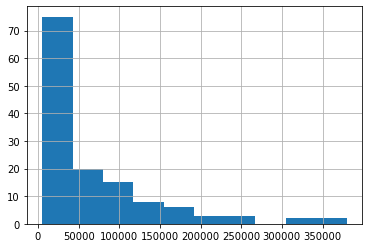

In [36]:
monthly_income=good_clients['monthly_income'].hist()

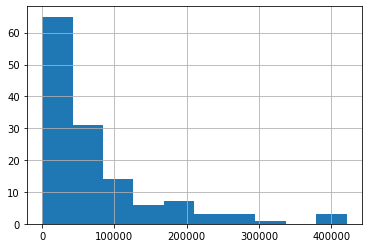

In [53]:
monthly_outcome=good_clients['monthly_outcome'].hist()

In [38]:
## Good clients vs Bad clients

In [39]:
bad_clients=users_and_credit['class'] == 0
bad_clients=users_and_credit[bad_clients]
bad_clients

,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
1,1,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,53.0,Semanal,0.0,10400.0,0.0,0.0,0.0,0.0,0.0,0.0,8940,789,0
2,2,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,400.0,16000.0,13400.0,0.0,200.0,10.0,2.0,408.0,11436,3316,0
5,5,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Crédito al Consumo,26.0,Semanal,0.0,4598.0,0.0,0.0,0.0,0.0,0.0,0.0,166,5240,0
8,8,TIENDA DEPARTAMENTAL,Pagos Fijos,Aparatos - Muebles,12.0,Mensual,977.0,977.0,977.0,7203.0,977.0,5.0,13.0,977.0,31695,3021,0
9,9,VENTA POR CATALOGO,Pagos Fijos,Crédito al Consumo,65.0,Semanal,0.0,8775.0,0.0,0.0,0.0,0.0,0.0,0.0,2401260,6496313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,982,TIENDA COMERCIAL,Revolvente,Tarjeta de Crédito,0.0,Mensual,0.0,0.0,0.0,12000.0,0.0,0.0,0.0,0.0,20167,44208,0
983,983,BANCOS,Pagos Fijos,Préstamo Personal,10.0,Catorcenal,0.0,6003.0,0.0,6003.0,0.0,0.0,1.0,743.0,9256,246,0
988,988,HIPOTECARIO NO BANCARIO,Hipoteca,Hipotecario O Vivienda,300.0,Mensual,982.0,93246.0,172139.0,0.0,95147.0,24.0,84.0,95147.0,4910,6086,0
993,993,COMUNICACIONES,Revolvente,Línea de Crédito,0.0,Mensual,0.0,3119.0,0.0,3597.0,0.0,3.0,0.0,0.0,17461,12122,0


In [43]:
bad_clients =  bad_clients[(bad_clients.monthly_income <= 500000) 
                                              & (bad_clients.monthly_income >= 5000)]

In [46]:
bad_clients = bad_clients.drop(bad_clients[bad_clients['total_credit_payments']==0 ].index)

In [47]:
bad_clients = bad_clients[(bad_clients.total_credit_payments > 12)]

In [48]:
bad_clients.describe()

,user_id,total_credit_payments,amount_to_pay_next_payment,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_past_due_balance,monthly_income,monthly_outcome,class
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,460.13000,114.260000,4097.890000,73263.050000,82346.220000,47038.720000,9027.03000,6.540000,6.030000,11350.560000,55653.120000,43300.630000,0.0
std,293.29668,129.627331,20822.755993,108973.213563,166376.765749,92867.703387,36775.96576,14.388842,10.035749,38400.675869,74869.223492,67876.795958,0.0
min,1.00000,13.000000,0.000000,415.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5073.000000,12.000000,0.0
25%,186.25000,26.000000,0.000000,6289.250000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,9060.750000,3355.750000,0.0
50%,445.50000,53.000000,0.000000,15707.000000,0.000000,0.000000,0.00000,0.000000,2.000000,366.000000,23390.500000,15689.500000,0.0
75%,702.00000,100.500000,2084.000000,126869.250000,57437.750000,3701.250000,267.00000,4.250000,7.250000,3863.750000,71266.000000,48377.750000,0.0
max,974.00000,360.000000,204366.000000,600000.000000,708646.000000,336437.000000,258801.00000,92.000000,44.000000,258801.000000,412384.000000,338853.000000,0.0


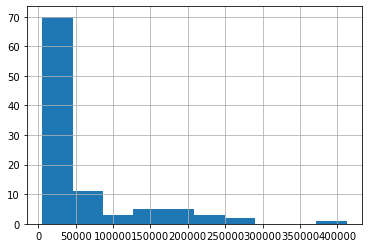

In [49]:
monthly_income=bad_clients['monthly_income'].hist()

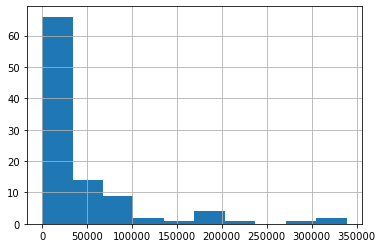

In [50]:
monthly_outcome=bad_clients['monthly_outcome'].hist()

# Good client vs Bad client

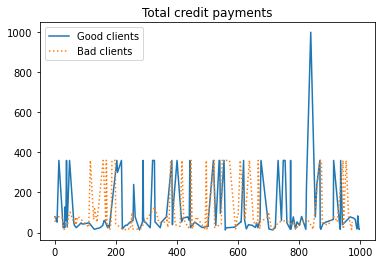

In [96]:
plt.title("Total credit payments") 
plt.plot(good_clients['total_credit_payments'], label = "Good clients")
plt.plot(bad_clients['total_credit_payments'], linestyle=':',label='Bad clients')
plt.legend()

# Amount to pay next payment 

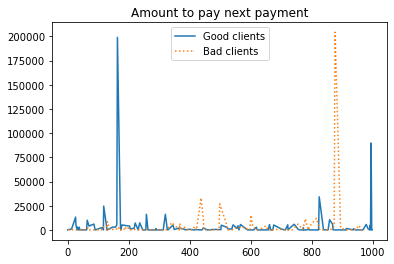

In [97]:
 plt.title("Amount to pay next payment") 
plt.plot(good_clients['amount_to_pay_next_payment'], label = "Good clients")
plt.plot(bad_clients['amount_to_pay_next_payment'], linestyle=':',label='Bad clients')
plt.legend()

# Worst delinquency

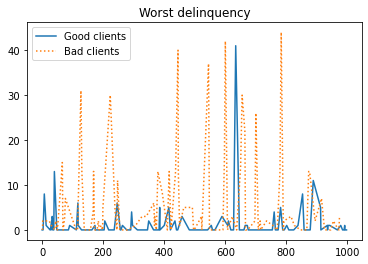

In [98]:
plt.title("Worst delinquency") 
plt.plot(good_clients['worst_delinquency'], label = "Good clients")
plt.plot(bad_clients['worst_delinquency'], linestyle=':',label='Bad clients')
plt.legend()

#  Monthly income 

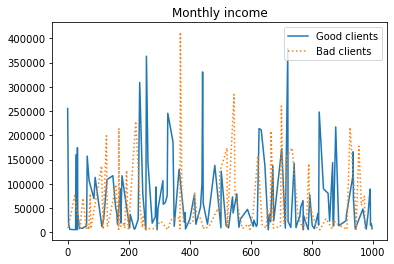

In [100]:
plt.title("Monthly income")
plt.plot(good_clients['monthly_income'], label = "Good clients")
plt.plot(bad_clients['monthly_income'], linestyle=':',label='Bad clients')
plt.legend()


# Monthly outcome

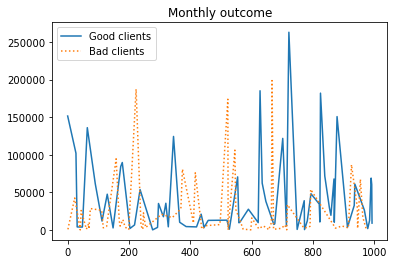

In [101]:
plt.title("Monthly outcome") 
plt.plot(good_clients_relation['monthly_outcome'], label = "Good clients")
plt.plot(bad_clients_relation['monthly_outcome'], linestyle=':',label='Bad clients')
plt.legend()